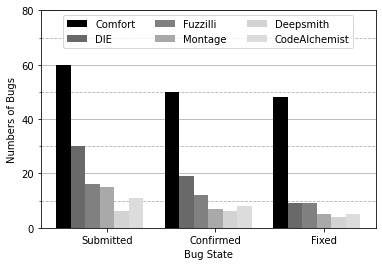

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def extractMetrics(number, result):
    # 对各个引擎的统计结果画图
    Submit = {"Comfort": result['COMFORT_info']['Submitted'], "DIE":result['DIE_info']['Submitted'],
              "Fuzzilli":result['Fuzzilli_info']['Submitted'], "Montage": result['Montage_info']['Submitted'],
              "Deepsmith": result['DeepSmith_info']['Submitted'], "CodeAlchemist": result['CodeAlchemist_info']['Submitted']}
    Submitted = Submit[number]
    Confirm = {"Comfort": result['COMFORT_info']['Confirmed'], "DIE":result['DIE_info']['Confirmed'],
               "Fuzzilli":result['Fuzzilli_info']['Confirmed'], "Montage": result['Montage_info']['Confirmed'],
              "Deepsmith": result['DeepSmith_info']['Confirmed'], "CodeAlchemist": result['CodeAlchemist_info']['Confirmed']}
    Confirmed = Confirm[number]
    Fix = {"Comfort": result['COMFORT_info']['Fixed'], "DIE":result['DIE_info']['Fixed'],
               "Fuzzilli":result['Fuzzilli_info']['Fixed'], "Montage": result['Montage_info']['Fixed'],
              "Deepsmith": result['DeepSmith_info']['Fixed'], "CodeAlchemist": result['CodeAlchemist_info']['Fixed']}
    Fixed = Fix[number]
    return [Submitted, Confirmed, Fixed]

def drawBars(result):
    arguments = ["Submitted", "Confirmed", "Fixed"]
    comfort = extractMetrics("Comfort", result)
    die = extractMetrics("DIE", result)
    fuzzilli = extractMetrics("Fuzzilli", result)
    montage = extractMetrics("Montage", result)
    deepsmith = extractMetrics("Deepsmith", result)
    codeAlchemist = extractMetrics("CodeAlchemist", result)
    fuzzers = [comfort, die, fuzzilli, montage, deepsmith, codeAlchemist]
    fuzzer_names = ["Comfort", "DIE", "Fuzzilli", "Montage", "Deepsmith", "CodeAlchemist"]
    fc = ['k', 'dimgray', 'grey', 'darkgray', 'lightgray', 'gainsboro']

    x = list(range(len(comfort)))
    total_width, n = 0.8, 6
    width = total_width / n

    # 设置主次刻度间隔
    ymajorLocator = MultipleLocator(20)
    yminorLocator = MultipleLocator(10)

    # 设置y轴刻度值
    plt.yticks([0, 20, 40, 60, 80])
    plt.ylim(0, 80)
    # 设置主次刻度线
    plt.grid(which="major", axis="y", linestyle="-")
    plt.grid(which="minor", axis="y", linestyle="--")
    # 显示主次刻度
    plt.gca().yaxis.set_major_locator(ymajorLocator)
    plt.gca().yaxis.set_minor_locator(yminorLocator)

    plt.xlabel("Bug State")
    plt.ylabel("Numbers of Bugs")
    # 显示柱状图
    for i in range(len(fuzzers)):
        if i == len(fuzzers) - 3:
            # zorder越大，表示柱子越靠后，不会被虚线覆盖
            plt.bar(x, fuzzers[i], width=width, label=fuzzer_names[i], tick_label=arguments, fc=fc[i], zorder=2)
        else:
            plt.bar(x, fuzzers[i], width=width, label=fuzzer_names[i], fc=fc[i], zorder=2)
        for j in range(len(x)):
            x[j] = x[j] + width

    plt.legend(loc='upper center', fontsize=10, ncol=3)
    plt.show()
    plt.style.use('ggplot')


if __name__ == "__main__":
    result = {'COMFORT_info': {'Submitted': 60, 'Confirmed': 50, 'Fixed': 48}, 'DIE_info': {'Submitted': 30, 'Confirmed': 19, 'Fixed': 9}, 'Fuzzilli_info': {'Submitted': 16, 'Confirmed': 12, 'Fixed': 9}, 'Montage_info': {'Submitted': 15, 'Confirmed': 7, 'Fixed': 5}, 'DeepSmith_info': {'Submitted': 6, 'Confirmed': 6, 'Fixed': 4}, 'CodeAlchemist_info': {'Submitted': 11, 'Confirmed': 8, 'Fixed': 5}}
    drawBars(result)